<a href="https://colab.research.google.com/github/CodeHunterOfficial/NLP/blob/main/Lecture_5_Neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Первые шаги в нейронных сетях: перцептроны и метод обратного распространения ошибки

##План
* История нейронных сетей. 
* Построение многослойной структуры перцептронов. 
* Обратное распространение ошибки. 
* Управляющие элементы нейронных сетей. 
*Реализация простейшей нейронной сети в Keras.

За последние годы было поднято немало шумихи вокруг перспектив нейронных сетей и их возможностей классифицировать/распознавать данные, а совсем недавно — и по поводу способностей определенных архитектур сетей генерировать новый контент. Большие и маленькие компании применяют их для чего угодно, начиная от генерации подписей к изображениям и навигации беспилотных автомобилей и до идентификации солнечных батарей по спутниковым фотографиям и распознавания лиц на видео с камер наблюдения. К счастью, существует множество способов применения нейронных сетей в сфере NLP. Хотя глубокие нейронные сети вызвали множество разговоров и преувеличений, до власти над нами роботов, вероятно, еще очень далеко, гораздо дальше, чем то признают статьи с сенсационными заголовками. Впрочем, нейронные сети — весьма мощный инструмент. Их удобно использовать в конвейере NLP чат-бота для классификации входного текста, автореферирования документов и даже для генерации новых текстов. 

Эта глава задумана как азбука для тех, кто еще не сталкивался с нейронными сетями. Здесь не будет ничего связанного конкретно с NLP, но базовое понимание происходящего внутри нейронных сетей важно для последующих глав. Если вы уже знакомы с основами, то можете спокойно пропустить эту главу и перейти к следующей, посвященной обработке текста с помощью разнообразных нейронных сетей. Хотя лежащая в их основе математика, метод обратного распространения ошибки, выходит за рамки данной книги, общий обзор его функциональности поможет лучше разобраться в терминологии и скрытых в ней закономерностях.

##5.1. Нейронные сети, список ингредиентов 

Доступность вычислительных ресурсов и памяти резко возросла за последний десяток лет, и одна старая технология снова стала актуальна. Перцептрон1, впервые предложенный в 1950-х Фрэнком Розенблаттом (Frank Rosenblatt), стал новым алгоритмом для поиска закономерностей в данных. 

Основная идея состоит в подражании работе живой клетки-нейрона. Через дендриты (dendrites) в ее ядро поступают электрические сигналы (рис. 5.1), и начинает накапливаться электрический заряд. Когда он достигает определенного уровня, нейрон возбуждается (fire) и посылает электрический сигнал через аксон (axon). Не все дендриты одинаковы. К сигналам, поступающим через некоторые дендриты, клетка более чувствительна, чем к другим, так что для возбуждения аксона через них достаточно меньшего заряда. 

Разумеется, биологические процессы, определяющие эти взаимосвязи, выходят далеко за рамки данной книги, но основная идея, которая нас интересует, заключается в том, что клетка выбирает, когда возбудиться, с учетом веса входящих сигналов. Нейрон динамически меняет эти веса процесса принятия решений за время своей жизни. Мы сымитируем данный процесс.


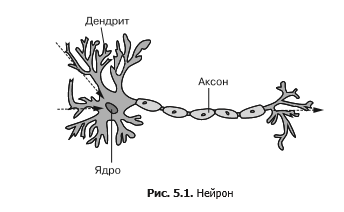

###5.1.1. Перцептрон Целью исходного проекта 

Розенблатта было научить машину распознавать изображения. Первоначальный перцептрон представлял собой скопление фоторецепторов и потенциометров, а не компьютер в нынешнем понимании этого слова. Если не считать особенностей реализации, идея Розенблатта заключалась в присвоении весов (меры важности) каждому из признаков изображения, которые представляли собой небольшой фрагмент изображения. 

Изображение «демонстрировалось» сетке фоторецепторов, отдельный из которых мог «видеть» лишь маленький фрагмент изображения. Сила сигнала, отправляемого конкретным фоторецептором соответствующему дендриту, определялась яркостью видимого им фрагмента изображения. 

У каждого дендрита был свой вес в виде потенциометра. При поступлении достаточно мощного сигнала потенциометр пропускал этот сигнал в основное тело «ядра клетки». При превышении суммы этих сигналов от всех потенциометров определенного порогового значения перцептрон возбуждал аксон, указывая на совпадение представленного ему изображения. Отсутствие возбуждения дендрита для заданного изображения классифицировалось как несовпадение. Он работал в режиме «хот-дог, не хот-дог» или «ирис щетинистый, не ирис щетинистый». 

### 5.1.2. Числовой перцептрон 

Пока что мы много болтали о биологии, электрическом токе и фоторецепторах. Остановимся и выделим самое важное из всего этого. 

Фактически мы хотели бы показать один пример из набора данных алгоритму и получить от того ответ «да» или «нет». Именно это мы и делали. Прежде всего нам нужен способ выделить признаки этой выборки. Подбор подходящих признаков оказывается на удивление непростой частью машинного обучения. В «обычных» задачах машинного обучения, например при предсказании цен на недвижимость, признаками могут быть, скажем, площадь в квадратных метрах, последняя цена продажи и почтовый индекс. Или нам может понадобиться предсказать определенный цветок на основе набора данных Iris. В этом случае признаками будут длина и ширина лепестков, длина и ширина чашелистика. В опыте Розенблатта признаками служили значения яркости каждого из пикселов (фрагментов изображения), по одному пикселу на фоторецептор. Далее необходим набор присваиваемых признакам весов. Не волнуйтесь пока что о том, откуда эти веса берутся. Можете просто считать их процентной долей пропускаемого в нейрон сигнала. Если вам знаком метод линейной регрессии, то вы уже знаете, откуда они берутся.

**ПРИМЕЧАНИЕ** 
>Обычно отдельные признаки обозначаются 
$x_i$, где i — целое число. Набор всех признаков для заданного примера обозначается X , где X — вектор:

$$ X = [ x_1, x_2… x_i … x_n ].$$

 И аналогично, веса для признаков обозначаются wi , где i — индекс соответствующего этому весу признака x . Веса обычно представлены в виде вектора W : 
 
 $$W = [ w_1, w_2… w_i … w_n ].$$

При наличии признаков и весов достаточно умножить признаки на соответствующие веса и просуммировать:

$$ (x_1 ⋅ w_1) + (x_2 ⋅ w_2) + … + (x_i ⋅ w_i) + … $$

Не хватает только порогового значения возбуждения нейрона. И это именно пороговое значение. Как только взвешенная сумма превышает определенный порог, перцептрон выдает 1. В противном случае — 0. Это пороговое значение можно представить в виде простой ступенчатой функции (step function), которая на рис. 5.2 названа функцией активации. 

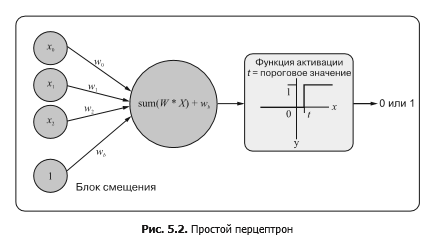

###5.1.3. Коротко про смещение 

На рис. 5.2 и в данном примере упоминается смещение (bias). Что это такое? Смещение — это постоянно присутствующий на входе нейрона сигнал. Как и у любого другого элемента входных данных нейрона, у него есть свой вес, который обрабатывается аналогично всем остальным. В различной посвященной нейронным сетям литературе его представляют двумя способами. Например, встречается представление входных данных в виде основного входного вектора, скажем, из n элементов и единицы, добавляемой в начало или конец вектора, в результате чего получается $(n + 1)$-мерный вектор. Позиция этой единицы для сети неважна, лишь бы она была одинаковой для всех выборок. В других случаях предполагается наличие постоянного смещения, которое отбрасывается из входных данных на диаграмме, но соответствующий ему вес существует независимо и всегда умножается на 1 и прибавляется к скалярному произведению значений входных сигналов выборки и соответствующих весов. Фактически оба способа аналогичны. Мы просто заранее указали вам два распространенных способа описания этого понятия.

Основная причина, по которой вообще нужен вес смещения, — требование устойчивости нейрона ко всем нулевым входным сигналам. Может так случиться, что сеть должна обучиться выдавать 0 в случае нулевых входных сигналов, хотя такого не должно быть. Без смещения нейрон выдаст 0 * вес = 0 для любых начальных (или усваиваемых) весов. Со смещением этой проблемы не будет. Если нейрону нужно выдавать 0, он может обучиться уменьшать соответствующий смещению вес настолько, чтобы скалярное произведение не превышало пороговое значение. 

На рис. 5.3 представлена довольно точная визуализация аналогий между сигналами в живом нейроне из мозга человека и сигналами искусственного нейрона, применяемого для глубокого обучения. Если хотите разобраться получше, задумайтесь, как вы используете свои живые нейроны для изучения глубокого обучения1 при чтении этой книги про обработку естественного языка.

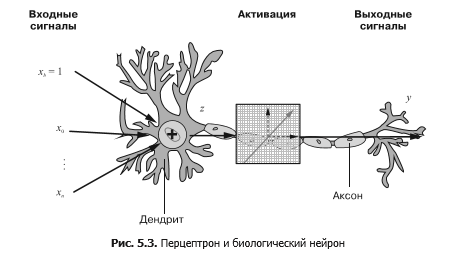

На математическом языке выходной сигнал перцептрона, обозначаемый f(x), выглядит так, как в уравнении 5.1.

**Уравнение 5.1**. Пороговая функция активации

$$f(\hat{x})=1, если \sum\limits_{i=0}^n x_i w_i>прогового значения, в противном случае \,0$$

**ПРИМЕЧАНИЕ** 
>Сумма попарных произведений элементов входного вектора (X) и вектора весов (W) — как раз скалярное произведение двух векторов. Это одна из важнейших причин, почему линейная алгебра играет такую важную роль в разработке нейронных сетей. Другой побочный эффект подобной структуры перемножения матриц в перцептроне — невероятная эффективность GPU современных компьютеров для реализации нейронных сетей благодаря высочайшей оптимизации в них операций линейной алгебры.


Пока наш перцептрон ничему не обучился. Но мы все же добились многого. Мы передали данные в модель и получили выходной сигнал. Вероятно, этот выходной сигнал ошибочен, поскольку мы пока не говорили о том, откуда берутся значения весов. Но здесь и начинается самое интересное.

**ПРИМЕЧАНИЕ** 
>Базовый блок любой нейронной сети — нейрон. Простейший перцептрон — частный случай более общего понятия нейрона. Пока что мы будем называть перцептроны нейронами.

## Реализация нейрона на Python 

На Python можно очень легко вычислить выходной сигнал описанного выше нейрона. Можно также воспользоваться функцией dot библиотеки NumPy для перемножения двух векторов:


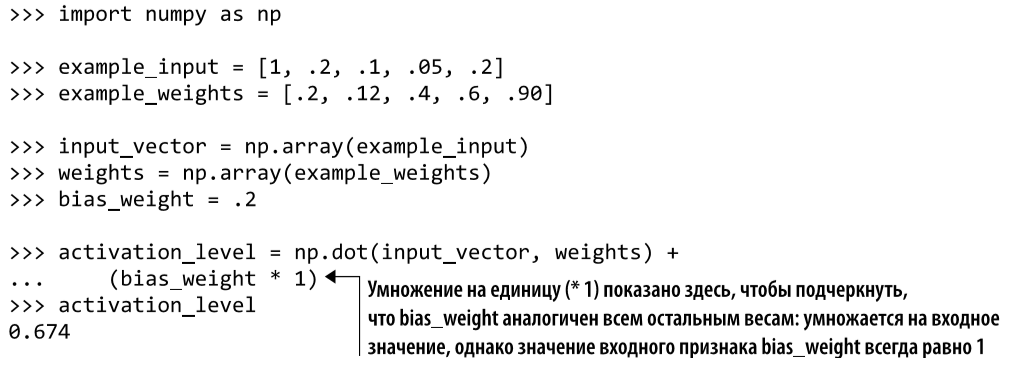

In [14]:
import numpy as np
example_input=[1, .2, .1, .05,.2]
example_weights=[.2, .12, .4, .6, .90]

input_vector=np.array(example_input)
weights=np.array(example_weights)
bias_weight=.2

activation_level=np.dot(input_vector, weights)+(bias_weight*1)
activation_level

0.6740000000000002

После этого можно воспользоваться простой пороговой функцией активации, выбрав пороговое значение 0.5, и сделать следующее: 

In [15]:
threshold = 0.5
if activation_level >= threshold: 
  perceptron_output = 1
else:
  perceptron_output = 0
perceptron_output 

1

При указанном example_input и данном наборе весов этот перцептрон выдаст 1. Но в случае нескольких векторов example_input и соответствующих ожидаемых результатов для каждого маркированного набора данных вы можете определить, правильные ли результаты он вернул в каждом из случаев. 

###Начнем урок 
До сих пор мы прокладывали путь к предсказанию на основе данных, готовя фундамент для основного блюда: машинного обучения. Мы рассматривали значения весов как случайные. Они являются ключом ко всему, и нам нужен способ «подталкивать» их в сторону увеличения или уменьшения в зависимости от результатов предсказания для конкретного примера. 

Перцептрон обучается в процессе увеличения или уменьшения весов как функции от погрешности результатов работы системы для конкретных входных данных. Но с чего он начинает? Веса необученного нейрона подбираются случайно! Такие значения, обычно близкие к нулю, выбираются из нормального распределения. Из предыдущего примера видно, почему нулевые начальные значения весов (включая вес смещения) могут привести только к нулевому выходному сигналу. Но ввод небольшого разброса значений без предпочтений какому-либо одному из путей через нейрон дает нам плацдарм, от которого можно отталкиваться для получения правильных или неправильных результатов. 

Тогда можно начинать обучение. Системе демонстрируется множество различных выборок, и всякий раз веса чуть-чуть корректируются в зависимости от того, соответствует ли выходной сигнал нейрона желаемому или нет. При достаточной выборке (и при надлежащих условиях) ошибка должна стремиться к нулю, а система — обучиться. 

Хитрость состоит — и это ключ ко всему методу — в корректировке весов в зависимости от их вклада в итоговую ошибку. Чем больше вес (то есть чем сильнее точка данных влияет на результат), тем большая ответственность лежит на нем за правильность/ошибочность выходного сигнала перцептрона для конкретного входного сигнала. 

Предположим, что вышеприведенный example_input должен привести к 0 на выходе перцептрона:


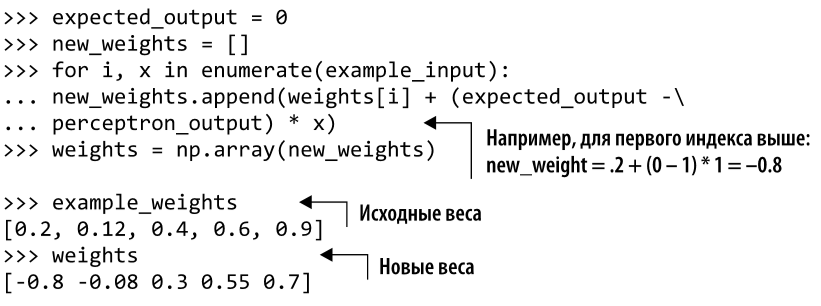

In [16]:
expected_output = 0
# новый вес = старый вес + (ожидаемый результат - вывод персептрона) * входные данные для этого веса
# например, в первом индексе выше new_weight = .2 + (0 - 1) * 1 = -0,8
new_weights = []
for i, x in enumerate(example_input):
    new_weights.append(weights[i] + (expected_output - perceptron_output) * x)
weights = np.array(new_weights)

print('Original Weights: ', example_weights)
print('New Weights: ', weights)

Original Weights:  [0.2, 0.12, 0.4, 0.6, 0.9]
New Weights:  [-0.8  -0.08  0.3   0.55  0.7 ]


Процесс демонстрации сети снова и снова одного и того же тренировочного набора данных при надлежащих условиях ведет к точным предсказаниям даже на тех данных, которые перцептрон пока что не видел.

##Логика — забавная дисциплина 

Предыдущий пример содержал лишь случайный набор чисел для демонстрации математики. Применим этот алгоритм к решению задачи. Конечно, это тривиальная модельная задача, но она демонстрирует основы того, как обучить компьютер чемулибо, просто показав ему маркированную выборку. 

Попробуем заставить компьютер понять принцип логического OR. Если хотя бы одна (или обе) часть выражения истинна, то истинно и все выражение OR. Достаточно просто. Для этой модельной задачи можно легко смоделировать все возможные примеры вручную (в реальных задачах такое встречается редко). Каждая выборка состоит из двух сигналов, каждый из которых истинен (1) или ложен (0) (листинг 5.1).


In [17]:
sample_data = [[0, 0], # False, False ... 
               [0, 1], # False, True
               [1, 0], # True, False ... 
               [1, 1]] # True, True

expected_results = [0, # (False OR False) дает False ... 
                    1, # (False OR True ) дает True ...
                    1, # (True  OR False) дает True ...
                    1] # (True  OR True ) дает True
activation_threshold = 0.5 

Для начала нам понадобится несколько инструментов: NumPy, чтобы умножить векторы (массивы), и random для задания начальных значений весов: 

In [18]:
from random import random
import numpy as np
weights = np.random.random(2)/1000 # Small random float 0 < w < .001 
weights

array([0.00083591, 0.00035711])

Также нам нужно смещение: 

In [19]:
bias_weight = np.random.random() / 1000
bias_weight 

0.0003618574882897474

Теперь можно передать его по конвейеру и получить предсказание для каждой из наших четырех выборок (листинг 5.2).

In [20]:
#Листинг 5.2. Случайное гадание перцептрона
for idx, sample in enumerate(sample_data):
  input_vector = np.array(sample)
  activation_level = np.dot(input_vector, weights) +(bias_weight * 1) 
  if activation_level > activation_threshold:
    perceptron_output = 1
  else:
    perceptron_output = 0
    print('Predicted {}'.format(perceptron_output))
    print('Expected: {}'.format(expected_results[idx]))
    print()

Predicted 0
Expected: 0

Predicted 0
Expected: 1

Predicted 0
Expected: 1

Predicted 0
Expected: 1



Случайные значения весов не слишком помогли нашему маленькому нейрону: один раз он угадал и три раза — нет. Отправим его снова в школу. Вместо того чтобы просто выводить 1 или 0, мы будем обновлять веса на каждой итерации (листинг 5.3).

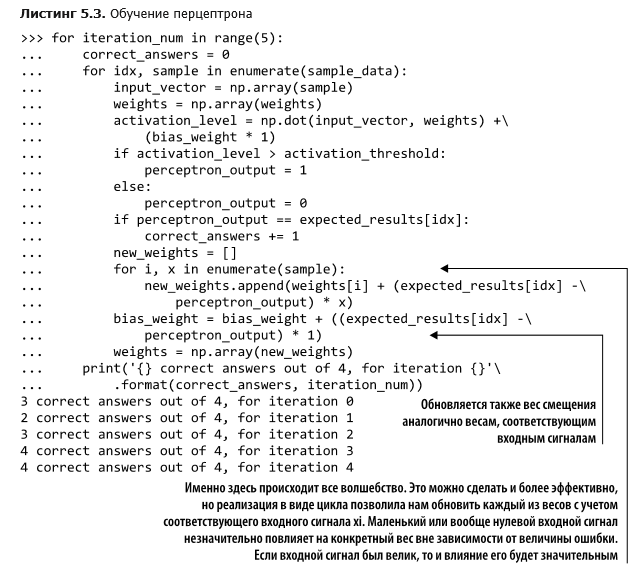

In [21]:
for iteration_num in range(5):
    correct_answers = 0
    for idx, sample in enumerate(sample_data):
       input_vector = np.array(sample)
       weights = np.array(weights)
       activation_level = np.dot(input_vector, weights) + (bias_weight * 1)
       if activation_level > activation_threshold:
            perceptron_output = 1
       else:
            perceptron_output = 0

       if perceptron_output == expected_results[idx]:
            correct_answers += 1
       new_weights = []
       for i, x in enumerate(sample):
            new_weights.append(weights[i] + (expected_results[idx] - perceptron_output) * x)

       bias_weight = bias_weight + ((expected_results[idx] - perceptron_output) * 1)
       weights = np.array(new_weights)

    print('{} correct answers out of 4, for iteration {}'.format(correct_answers, iteration_num))

3 correct answers out of 4, for iteration 0
2 correct answers out of 4, for iteration 1
3 correct answers out of 4, for iteration 2
4 correct answers out of 4, for iteration 3
4 correct answers out of 4, for iteration 4


Какой замечательный студент наш маленький перцептрон! Благодаря обновлению весов во внутреннем цикле он обучается на своем опыте обработки конкретного набора данных. После первой итерации он получает на два правильных ответа больше (три из четырех), чем при случайном гадании (один из четырех). 

На второй итерации он избыточно корректирует веса (изменяет их слишком сильно), так что ему приходится немного откатить назад внесенные в веса поправки. К четвертой итерации перцептрон идеально усваивает все взаимосвязи. Последующие итерации никак сеть не обновляют, поскольку ошибка на всех выборках равна 0 и никакие поправки весов не производятся.

Этот процесс называется сходимостью (convergence). Говорят, что модель сошлась, если ее функция ошибки дошла до минимума или хотя бы до какого-то постоянного значения. Иногда такого везения нет. Нейронная сеть скачет вокруг да около в поисках оптимальных весов, удовлетворяющих взаимосвязям в пакете данных, и никогда не сходится. В разделе 5.8 мы покажем, как на веса, которые нейронная сеть «считает» оптимальными, влияет целевая функция, или функция потерь. 

## Следующий шаг 

У простейшего перцептрона есть недостаток. Если данные линейно неразделимы или взаимосвязь невозможно описать с помощью линейной зависимости, то модель не сойдется и никакими полезными способностями к предсказанию обладать не будет. Она не сможет правильно предсказывать целевую величину. 

В ранних опытах модели успешно обучались классифицировать изображения на основе одних только примеров изображений и информации про их классы. Первые восторги по поводу этой идеи быстро утихли после выхода работы Минского и Пейперта1, которые показали, что виды доступной перцептрону классификации сильно ограниченны. Ученые продемонстрировали, что если выборки данных неразделимы линейно на дискретные группы, то перцептрон не сможет научиться классифицировать входные данные (рис. 5.4).


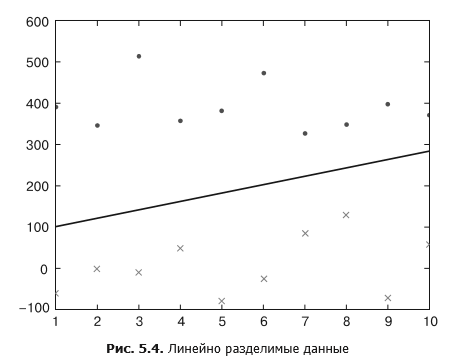

Линейно разделимые точки данных (как показано на рис. 5.4) не проблема для перцептрона. Перекрещенные же данные приведут к тому, что однонейронный перцептрон будет бесконечно работать, но не обучится при этом делать лучшие, по сравнению со случайными догадками (подбрасыванием монеты), предсказания. Разделить одной прямой два класса (точки и крестики) на рис. 5.5 невозможно.

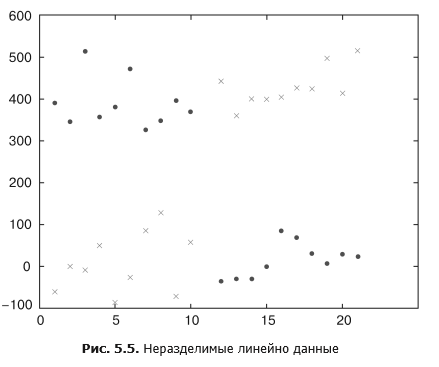

Перцептрон подбирает линейное уравнение, которое описывает взаимосвязь между признаками и целевой переменной в наборе данных. Он просто выполняет линейную регрессию и не может описать нелинейное уравнение или нелинейную взаимосвязь.

---
 
  **Локальный и глобальный минимум**
  
Когда перцептрон сходится, можно сказать, что он нашел линейное уравнение, описывающее взаимосвязь между данными и целевой переменной. Впрочем, о качестве этого описательного линейного уравнения или о том, насколько «минимальна» функция стоимости, он ничего не говорит. Если существует несколько решений, возможных минимумов стоимости, перцептрон сойдется к одному конкретному минимуму, который определяется начальными значениями весов. Он называется локальным минимумом (local minimum), поскольку является оптимальным (в смысле наименьшей стоимости) в окрестностях начальных значений весов. Но это вовсе не обязательно глобальный минимум (global minimum), то есть наилучшее решение для всех возможных весов. В большинстве случаев понять, найден ли глобальный минимум, невозможно.}

---



Многие взаимосвязи между значениями данных нелинейны. Нет хорошей линейной регрессии или линейного уравнения, которые бы их описывали. Многие наборы данных неразделимы линейно на классы с помощью прямых или плоскостей, а поскольку большая часть данных в мире неразделима линейно прямыми или плоскостями, то опубликованное Минским и Пейпертом «доказательство» отправляет перцептрон на полку.

Но от идеи перцептрона не отказались так просто. О ней снова заговорили, когда в совместной работе Румельхарта и Макклелланда (при участии Джеффри Хинтона) было показано, что ее можно использовать для решения задачи исключающего OR (XOR) с помощью согласованной работы нескольких перцептронов. Отдельным перцептроном без многослойного обратного распространения ошибки мы решили более простую задачу: OR. Главное достижение Румельхарта и Макклелланда заключалось в открытии способа подходящего распределения ошибки по перцептронам. Для этого они воспользовались давно известной идеей — методом обратного распространения ошибки. Первая нейронная сеть и возникла на основе обратного распространения ошибки по слоям нейронов. 

Существенный недостаток простейшего перцептрона в том, что если данные неразделимы линейно, то модель не сойдется к пригодному для выполнения предсказаний решению.


**ПРИМЕЧАНИЕ**

>В коде из листинга 5.3 мы решили задачу OR с помощью одного перцептрона. Полученная в результате обучения нашего перцептрона таблица из 1 и 0 в листинге 5.1 представляла собой результаты бинарного логического OR. Для задачи XOR эта таблица слегка меняется, чтобы обучить перцептрон имитировать логический вентиль типа XOR. Если поменять правильный ответ для последнего примера с 1 (true) на 0 (false), чтобы отразить логику XOR, задача сразу значительно усложняется. Примеры в двух классах (0 или 1) неразделимы линейно без добавления дополнительного нейрона в нашу нейронную сеть. Классы располагаются по диагонали друг от друга в нашем двумерном векторном пространстве признаков (аналогично рис. 5.5), так что никакой прямой нельзя отделить единицы (логические true) от нулей (логических false).


Хотя они позволяли решать сложные (нелинейные) задачи, но на то время нейронные сети были слишком затратными вычислительно. Решение задачи XOR с помощью двух перцептронов и кучи математических действий, связанных с обратным распространением ошибки, рассматривалось как напрасная трата драгоценных вычислительных ресурсов. Для широкого применения этот метод оказался непригодным и опять отправился на пыльные университетские полки и использовался только для опытов с суперкомпьютерами. Так началась вторая «зима» искусственного интеллекта  [Зима искусственного интеллекта](https://ru.wikipedia.org/wiki/Зима_искусственного_интеллекта#Неудачи_конца_1980-х_и_начале_1990-х_годов), длившаяся с 1990-го до примерно 2010 года3. В итоге вычислительные ресурсы, алгоритмы обратного распространения ошибки и обилие исходных данных, например маркированных изображений кошек и собак1, взяли свое. Требующие больших вычислительных ресурсов алгоритмы и ограниченные размеры наборов данных перестали быть непреодолимой преградой. Так началась третья эпоха нейронных сетей. 

Но вернемся к сути их открытия. 

## Выход из второй «зимы» искусственного интеллекта

 Большинство замечательных идей находят дорогу наружу. Оказалось, что лежащую в основе перцептрона простую идею можно расширить так, чтобы преодолеть «похоронившее» ее сначала ограничение. Идея состояла в объединении нескольких перцептронов с поступлением входного сигнала в один (или несколько) из них. Затем выходной сигнал этого перцептрона можно отправить на вход других и сравнить в итоге полученный результат с ожидаемым. Такая система (нейронная сеть) способна усваивать более сложные закономерности в данных и побороть проблему неразделимых линейно классов, например, как в случае задачи XOR. Основной вопрос: как обновить веса в предыдущих слоях? 

Задумаемся на минуту и формализуем одну из важных частей этого процесса. До сих пор мы обсуждали ошибки и погрешность предсказания перцептрона. Измерение этой ошибки — задача функции стоимости (cost function) или функции потерь (loss function). Первая, как вы уже видели, служит количественной мерой расхождения между правильными ответами, ожидаемыми от сети, и фактическими значениями выходных сигналов (y) для соответствующих «вопросов» (x), поступающих на вход сети. Вторая отражает частоту выдачи сетью неправильных ответов и степень их отличия от правильных. Один из примеров функции потерь (просто разница истинного значения и предсказания модели) приведен в уравнении 5.2.

Уравнение 5.2. Расхождение истинного значения и предсказания
$$err(x)=|y-f(x)$$

Цель обучения перцептрона или нейронной сети в целом — в минимизации этой функции потерь для всех имеющихся входных выборок (уравнение 5.3).

Уравнение 5.3. Минимизируемая функция потерь
$$J(x)=min \sum\limits_{i=1}^n err(x_i)$$

Скоро вы познакомитесь и с другими функциями потерь, например среднеквадратичной погрешностью, но выбирать лучшую не придется. Обычно в большинстве фреймворков нейронных сетей этот выбор сделан за вас. Самое главное: уяснить для себя идею, что минимизация функции потерь на всем наборе данных — наша конечная цель. Тогда все остальные описанные здесь идеи будут понятны.

##Метод обратного распространения ошибки 

Хинтон и его коллеги решили, что можно одновременно использовать несколько перцептронов для одной цели. Это позволит, как они показали, решать неразделимые линейно задачи. Теперь можно будет аппроксимировать и нелинейные функции. 

Но как же обновлять веса этих различных перцептронов? Что вообще означает фраза «вклад в ошибку»? Допустим, два перцептрона расположены рядом и получают одинаковый входной сигнал. Не важно, что произошло с выходным сигналом (конкатенация, сложение, умножение), все равно при распространении ошибки на исходные веса он будет функцией входного сигнала (одинакового для обоих перцептронов). Так что веса будут обновляться аналогично на каждом шаге, и мы ничего не добьемся. Наши нейроны окажутся избыточными. Их итоговые веса будут одинаковы, а сеть ничему особенно не обучится. 

Все еще больше запутывается, если представить себе перцептрон, выходной сигнал которого поступает во второй перцептрон в качестве входного сигнала. Именно это мы и собираемся сделать. 

Метод обратного распространения ошибки позволяет решить данную проблему, но для этого придется немного модифицировать наш перцептрон. Напомним, что веса обновлялись пропорционально их вкладу в общую погрешность. Но если вес влияет на выходной сигнал, который становится входным для другого перцептрона, то совершенно непонятно, какова была ошибка в начале этого второго перцептрона. 

Поэтому нужен способ вычислить вклад конкретного веса (w1i на рис. 5.6) в ошибку при условии, что он произвел этот вклад через другие веса (w1j) и (w2j) на следующем слое. И этот способ называется обратным распространением ошибки (backpropagation).


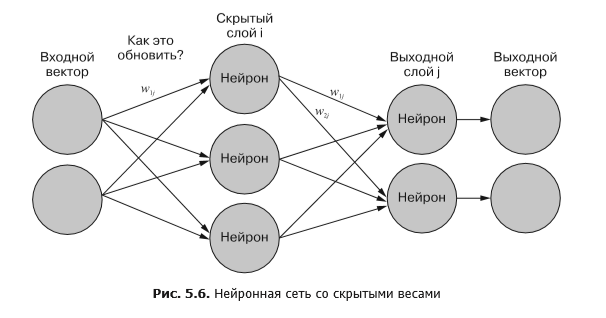

Настало время прекратить использовать термин «перцептрон», поскольку мы собираемся изменить способ обновления весов в каждом нейроне. С этого момента мы будем употреблять более общий термин «нейрон», включающий как перцептрон, так и родственные ему модели с большими возможностями. В литературе нейрон также называют клеткой (cell) или узлом (node) (при апелляции к графовому представлению нейросети), причем в большинстве случаев эти термины взаимозаменяемы. 

Нейронная сеть любого типа представляет собой не более чем набор связанных между собой нейронов. Их часто объединяют в слои, но это не обязательно. После построения архитектуры, в которой выходной сигнал одного нейрона становится входным сигналом другого, говорят о скрытых нейронах и слоях, в отличие от входного или выходного слоя или нейрона. 

Такая архитектура называется полносвязной сетью (fully connected network). Хотя на рис. 5.7 показаны не все связи. В такой сети каждый входной элемент связан с каждым нейроном в следующем слое. И каждой связи соответствует свой вес. Так что в сети из пяти нейронов, принимающей на входе четырехмерный вектор, в слое всего 20 весов (по четыре веса для связей каждого из пяти нейронов).

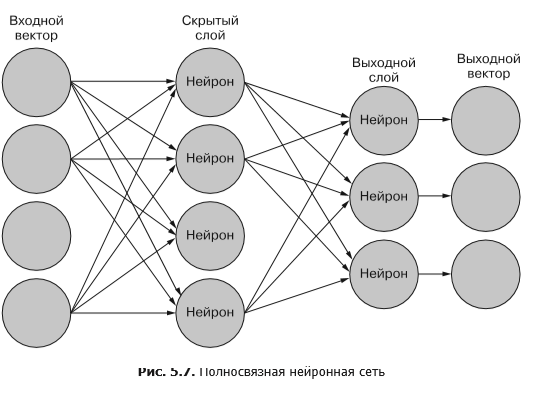

Каждому входному сигналу, как и у перцептрона, соответствует свой вес, а у нейронов из второго слоя нейронной сети веса соотносятся не с исходным входным сигналом, а с выходным первого слоя. Теперь должна быть понятна сложность вычисления вклада веса первого слоя в общую ошибку. Воздействие веса первого слоя передается не просто через еще один вес, а через один вес для каждого из нейронов следующего слоя. Вывод и математические подробности самого алгоритма, хотя и чрезвычайно интересны, выходят за рамки данной книги, но мы приведем краткий их обзор, чтобы нейронные сети не были для вас совсем «черным ящиком».

Обратное распространение (сокращение от «метод обратного распространения ошибки») описывает способ выяснения объема обновления для конкретного веса по заданному входному сигналу, выходному сигналу и ожидаемому значению. Распространение (propagation), оно же прямое распространение, означает продвижение «вперед» по сети и вычисление выходного сигнала сети для данного входного сигнала. Для перехода к обратному распространению ошибки необходимо сначала изменить функцию активации перцептрона на более сложную. 

До сих пор мы использовали в качестве функции активации нашего искусственного нейрона ступенчатую функцию. Как вы скоро увидите, для обратного распространения ошибки требуется нелинейная и непрерывно дифференцируемая функция активации1. При этом каждый из нейронов будет выдавать значение в некотором диапазоне, например от 0 до 1, как в часто применяемой сигма-функции, показанной в уравнении 5.4.

Уравнение 5.4. Сигма-функция
$$
S(x)=\frac{1}{1+e^{-x}}
$$


---
**Почему функция активации должна быть нелинейной**

 Чтобы нейроны могли моделировать нелинейные связи между векторами признаков и целевой переменной. Если все, на что способен нейрон, — умножать входные сигналы на веса и складывать их, то выходной сигнал всегда будет линейной функцией входных сигналов. Вы не сможете смоделировать даже простейшие нелинейные связи. 
 
 Но применявшаяся выше для наших нейронов пороговая функция представляла собой нелинейную ступенчатую функцию. Так что использовавшиеся нейроны теоретически можно было обучить моделировать сообща практически любую нелинейную связь... Если, конечно, у вас хватит для этого нейронов.
 
  В этом и преимущество нелинейной функции активации: с ее помощью нейронная сеть может моделировать нелинейную связь. Непрерывно дифференцируемая функция активации, например сигма-функция, позволяет гладко распространять ошибку через несколько слоев нейронов, что ускоряет процесс обучения. Сигма-нейроны — способные ученики.

---

Существует множество других функций активации, например гиперболический тангенс (hyperbolic tangent) и выпрямленные линейные блоки (rectified linear unit, ReLU), со своими достоинствами и недостатками. Каждая по-своему хороша для различных архитектур нейронных сетей, как вы узнаете в следующих главах. 

Так зачем же нужна дифференцируемость? Если можно вычислить производную функции, то можно вычислить и ее частные производные по различным переменным в ней. Ключевые слова тут: «по различным переменным». Это путь к обновлению весов с учетом полученной ими доли входного сигнала!

##Дифференцируем все возможное

 Начнем с погрешности сети и применим к ней функцию стоимости, например среднеквадратичную ошибку, как показано в уравнении 5.5.

Уравнение 5.5. Среднеквадратичная ошибка

$$
MSE=(y-f(x))^2
$$

Далее воспользуемся цепным правилом математического анализа для вычисления производной композиции функций, как в уравнении 5.6. Сеть представляет собой не что иное, как композицию функций (скалярных произведений, за которыми следует на каждом шаге наша новая нелинейная функция активации).
Уравнение 5.6. Цепное правило
$$
(f(g(x))'=F(x)=f'(g(x))g'(x)
$$

Эту формулу можно использовать для вычисления производных функций активации всех нейронов с учетом их входных сигналов, а значит, можно вычислить вклад конкретного веса в итоговую ошибку и откорректировать его соответствующим образом. 

Если слой — выходной, то обновление весов не представляет сложностей благодаря нашей легко дифференцируемой функции активации. Производная ошибки по $j$-му повлиявшему на ее значение выходному сигналу приведена в уравнении 5.7.


Уравнение 5.7. Производная ошибки

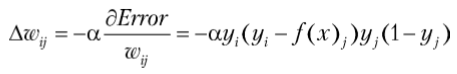

Обновление весов скрытого слоя — более сложная задача, как вы можете видеть из уравнения 5.8.

Уравнение 5.8. Производная предыдущего слоя

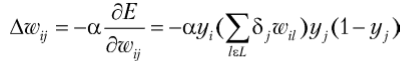


Функция f(x) из уравнения 5.7 представляет собой выходной сигнал: j-й элемент выходного вектора, y — выходной сигнал узла на i-м или j-м слое, где выходной сигнал i слоя является входным сигналом j. Поэтому α (скорость обучения) умножается на выходной сигнал предыдущего слоя, умноженный на производную функции активации с последующего слоя по весу, применяемому к выходному сигналу слоя i, поступающему в j. Сумма в уравнении 5.8 выражает эту идею для всех входных сигналов во все слои.

Важно четко понимать, когда изменения применяются к самим весам. Вычисления обновлений весов в каждом слое зависят от состояния сети во время прямого прохода. После вычисления ошибки мы высчитываем предлагаемые корректировки для всех весов в сети. Но не применяем ни одной из них — до тех пор пока не вернемся в начало сети. В противном случае при обновлении весов по направлению к концу сети вычисленные для более низких уровней производные не будут подходящим градиентом для конкретного входного сигнала. Можно агрегировать все подъемы и спуски для каждого из весов на основе тренировочных выборок без обновления каких-либо весов, а обновить их только в конце обучения. Подробнее этот вариант мы обсудим в подразделе 5.1.6. 

Для обучения сети мы передаем в нее все входные сигналы, получаем соответствующую каждому входному сигналу ошибку. Распространяем эти ошибки обратно к весам, после чего обновляем каждый из весов соответственно общему изменению ошибки. Однократный проход тренировочных данных через сеть с последующим обратным распространением ошибок называется эпохой (epoch) цикла обучения нейронной сети. После этого можно передавать сети набор данных снова и снова для дальнейшего уточнения весов. Будьте осторожны, чтобы не переобучить веса на тренировочном наборе данных, вследствие чего модель не сможет делать осмысленные предсказания для новых, не входивших в тренировочный набор данных точек. 

В уравнениях 5.7 и 5.8 параметр α представляет собой скорость обучения (learning rate). Он определяет, насколько сильно корректируется наблюдаемая в весе ошибка за конкретный цикл обучения (эпоху) или пакет данных. Обычно он остается неизменным на протяжении одного цикла обучения, но в некоторых продвинутых алгоритмах обучения он корректируется адаптивно для ускорения обучения и обеспечения сходимости. При слишком большом α можно легко скорректировать ошибку чересчур сильно. И следующая ошибка приведет к еще большей корректировке веса в другую сторону, но еще дальше от цели. Если же задать слишком маленькое значение α, то модель будет сходиться за слишком большое для практического применения время или, еще хуже, застрянет в локальном минимуме на поверхности ошибок (error surface). 

###5.1.4. Айда кататься на лыжах — поверхность ошибок

Цель обучения нейронных сетей, как мы упоминали выше, — поиск оптимальных параметров (весов), минимизирующих функцию стоимости. Помните, что речь идет не об ошибке для какой-либо одной точки данных. Необходимо минимизировать стоимость для всех различных ошибок вместе. 

Для построения ментальной модели происходящего при корректировке весов сети полезно создать визуализацию этой стороны задачи. 

Как упоминалось выше, одной из распространенных функций стоимости является среднеквадратическая ошибка (показана в уравнении 5.5). Если представить себе график ошибки как функции возможных весов, при заданных наборах входных и выходных сигналов существует точка, в которой эта функция близка к нулю. Это и есть наш минимум — место, в котором ошибка модели минимальна.

 Минимум — это набор весов, при котором выходной сигнал оптимален для заданного тренировочного примера. Эту ситуацию часто наглядно представляют в виде трехмерной чаши, где две оси координат — 2D-вектор весов, а третья — ошибка (рис. 5.8). 

Это описание, конечно, изрядно упрощено, но идея остается той же и для более многомерных пространств (то есть для случаев большего, чем два, количества весов).

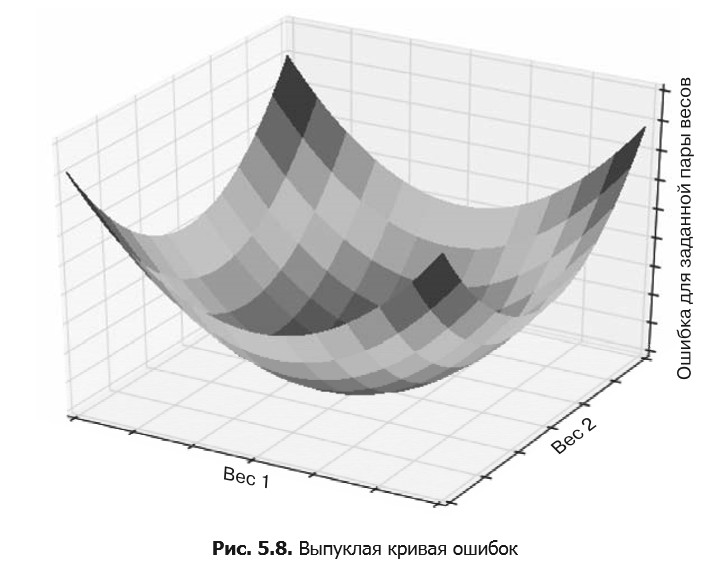

Аналогично можно построить график поверхности ошибки в виде функции от всех возможных весов для всех входных сигналов тренировочного набора данных. Но необходимо немного модифицировать функцию ошибки. Нужна такая функция, которая бы отражала совокупную ошибку всех входных сигналов для заданного набора весов. Здесь мы воспользуемся среднеквадратичной погрешностью в качестве оси Z (см. уравнение 5.5). 

Минимум поверхности ошибок будет соответствовать набору весов, который представляет модель, лучше всего подходящую для всего тренировочного набора данных. 

###5.1.5. С подъемника — на склон 


Что означает эта визуализация? На каждой эпохе алгоритм выполняет градиентный спуск, пытаясь минимизировать ошибку. Каждый раз мы корректируем веса в сторону (хочется надеяться) последующего снижения ошибки. Выпуклая поверхность ошибок отлично подойдет. Становимся на склоне на лыжах, оглядываемся по сторонам, выбираем путь вниз — и вперед!

Но вам не всегда повезет получить гладкую чашу. По поверхности ошибок может быть разбросано множество ям и выемок. Подобная ситуация называется невыпуклой поверхностью ошибок (nonconvex error curve). Как и при лыжном спуске, если ямы достаточно велики, можно в них провалиться и не добраться до низа склона.

Диаграммы отражают веса для двумерных входных сигналов. Но при 10-, 50- или 1000-мерных идея остается такой же. В таких пространствах более высокой размерности пытаться визуализировать бессмысленно, так что приходится доверять математике. Когда вы начнете применять нейронные сети, визуализация перестанет быть столь важной. Ту же информацию можно получить из наблюдения (или построения графика) ошибки или соответствующей метрики по времени обучения, чтобы выяснить, стремится ли она к 0. Так можно понять, в правильном ли направлении продвигается сеть. Но подобные 3D-визуализации — очень удобный инструмент для создания ментальной модели процесса. 

Как насчет невыпуклых поверхностей ошибок? Не создают ли проблему эти ямы и выемки? Еще как. В зависимости от случайных начальных значений весов процедура может завершиться на совершенно различных весах, и обучение прекратится, поскольку пути вниз из данного локального минимума не существует (рис. 5.9).

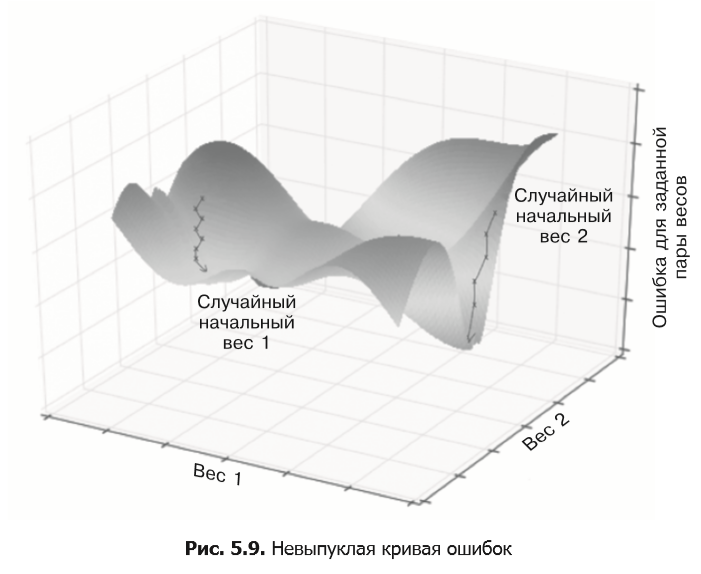

Имейте в виду, что локальные минимумы будут преследовать вас даже в пространствах с еще большей размерностью. 

####5.1.6. Проведем небольшую реорганизацию 

До сих пор мы агрегировали ошибки для всех тренировочных примеров и спускались на лыжах по склону в меру своих сил. Описанный подход к обучению представляет собой пакетное (batch) обучение. Пакет — большое подмножество обучающих данных, но поверхность ошибок одинакова для всех элементов данных пакета. При такой поверхности, если скатиться со склона со случайной начальной точки, можно оказаться в каком-либо локальном минимуме (выемке или яме) и не знать, что существуют лучшие значения весов. Обойти эти ловушки могут помочь два других варианта обучения. 

Первый вариант — стохастический градиентный спуск, когда значения весов обновляются после каждого тренировочного примера, а не после просмотра всех. И при каждом проходе такие примеры перемешиваются. Благодаря этому поверхность ошибок рисуется заново для каждого примера, поскольку ожидаемый ответ для каждого входного сигнала может отличаться. Но мы все равно корректируем веса на основе градиентного спуска для данного примера. Вместо агрегирования ошибок и корректировки весов однократно в конце эпохи мы обновляем веса после каждого отдельного примера. Главное, что всегда продвигаемся в направлении предполагаемого минимума (хотя и не проходим весь путь к нему). 

Двигаясь к различным минимумам на этой переменной поверхности, при правильных данных и правильных гиперпараметрах гораздо легче доковылять до глобального минимума. Если модель не настроена правильно или тренировочные данные противоречивы, то модель не сойдется и вы будете просто крутиться вокруг да около, а модель ничему не обучится. Но на практике стохастический градиентный спуск достаточно успешно обходит локальные минимумы в большинстве случаев. Недостаток подхода — его медлительность. Вычисление прямого прохода, обратного распространения ошибки и последующее обновление весов после каждого примера делает процесс еще медлительнее. 

Более распространенный подход, второй вариант, — мини-пакеты (mini-batch). При мини-пакетном обучении передается маленькое подмножество тренировочного набора данных и агрегируются соответствующие ошибки, как и в полном пакете. Эти ошибки затем распространяются обратно, как и для пакета, а веса обновляются для каждого такого подмножества тренировочного набора данных. Процесс повторяется со следующим пакетом и т. д. вплоть до окончания тренировочного набора данных. И такой процесс составляет одну эпоху. Это золотая середина, объединяющая преимущества пакетного (скоростного) и стохастического (устойчивого) методов обучения.

Хотя подробности работы метода обратного распространения ошибки весьма захватывающи (https://ru.wikipedia.org/wiki/Метод_обратного_распространения_ошибки), они далеко не тривиальны и, как уже отмечалось ранее, выходят за рамки данной книги. Но вам пригодится мысленный образ поверхности ошибок. Нейронная сеть — всего лишь способ спуска по склону чаши так быстро, как только можно, вплоть до самого дна. Находясь в заданной точке, оглядитесь вокруг, найдите самый крутой путь вниз (не слишком приятное зрелище, если вы боитесь высоты) и двигайтесь по нему. На следующем шаге (пакетном, мини-пакетном или стохастическом) снова оглядитесь вокруг, найдите самый крутой путь вниз и идите по нему. Достаточно скоро вы окажетесь у камина на лыжной базе внизу, в долине. 

###5.1.7. Keras: нейронные сети на Python

Написание нейронной сети на чистом языке Python — интересный опыт, который может помочь соединить в голове все детали. Но Python не слишком быстр, а само по себе число необходимых вычислений затрудняет создание нейронных сетей даже среднего размера. Существует множество библиотек Python, с помощью которых можно решить проблему быстродействия: PyTorch, Theano, TensorFlow, Lasagne и многие другие. В примерах из этой книги будет использоваться библиотека Keras, находящаяся по адресу https://keras.io/. 

Keras — высокоуровневый адаптер с удобным API для Python. Предоставляемый им API можно применять практически без изменений с тремя различными прикладными частями: Theano, TensorFlow от Google и CNTK от компании Microsoft. У каждой из них есть свои низкоуровневые реализации основных элементов нейронных сетей и прекрасно отлаженные библиотеки операций линейной алгебры для выполнения скалярных произведений и максимизации быстродействия матричных произведений нейронных сетей.

Взглянем на простую задачу XOR и посмотрим, сможем ли мы обучить сеть с помощью Keras (листинг 5.4).


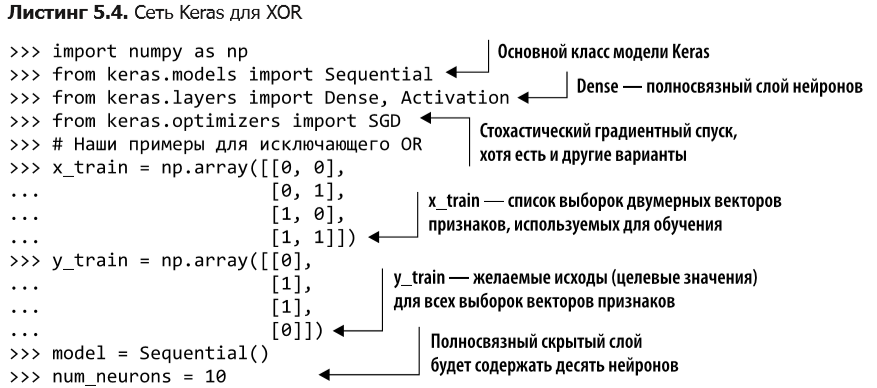

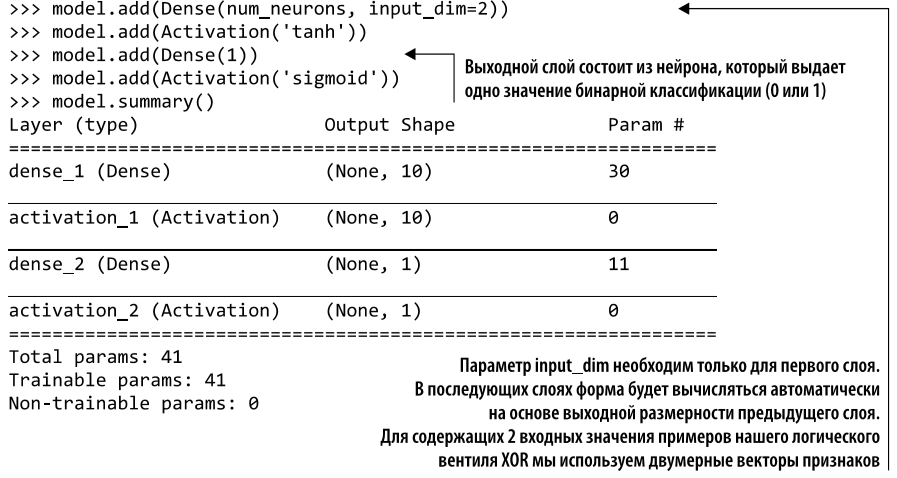

In [22]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
# Наши примеры для исключающего OR
x_train=np.array([[0,0],
                  [0,1],
                  [1,0],
                  [1,1]])

y_train=np.array([[0],
                  [1],
                  [1],
                  [0]])

In [23]:
model=Sequential()
num_neurons=10

model.add(Dense(num_neurons, input_dim=2))
model.add(Activation('tanh'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                30        
                                                                 
 activation_6 (Activation)   (None, 10)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
 activation_7 (Activation)   (None, 1)                 0         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


Вызов model.summary() возвращает сводку параметров сети и количества весов (Param \#) на каждом этапе. Немного арифметики: десять нейронов, каждый с двумя весами (по одному для каждого значения во входном векторе) плюс один вес для смещения. В результате необходимо подобрать значения 30 весов. Выходной слой содержит по весу для каждого из десяти нейронов и плюс один вес для смещения, итого 11 весов. 

Следующий фрагмент кода труднее для понимания: 

In [24]:
sgd = SGD(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


SGD — импортированный нами оптимизатор на основе стохаcтического градиентного спуска. С помощью именно этого метода модель будет минимизировать ошибку (потери — loss). lr — скорость обучения, коэффициент, применяемый к частной производной ошибки по каждому из весов. Чем выше ее значение, тем быстрее будет происходить обучение, но и выше риск «проскочить» мимо глобального минимума. При маленьком значении точность выше, но и дольше время обучения, да и модель более восприимчива к локальным минимумам. Сама функция потерь также описана в виде параметра, в данном случае binary_crossentropy. Параметр metrics представляет собой список опций выходного потока во время обучения. Метод compile создает, но не обучает модель. Задаются начальные значения весов, и это случайно выбранное состояние можно использовать для предсказаний на основе набора данных с получением, правда, лишь случайных догадок: 

In [25]:
model.predict(x_train) 

1/1 [==============================] - 0s 45ms/step


array([[0.5       ],
       [0.4909721 ],
       [0.46735543],
       [0.46686858]], dtype=float32)

Метод predict возвращает необработанный выходной сигнал последнего слоя, генерируемый в данном примере сигма-функцией. 

Похвастаться особо нечем. Но не забывайте, что у нашей модели нет никаких знаний про ответы; она просто применяет случайные веса к входным сигналам. Попробуем ее обучить (листинг 5.5).


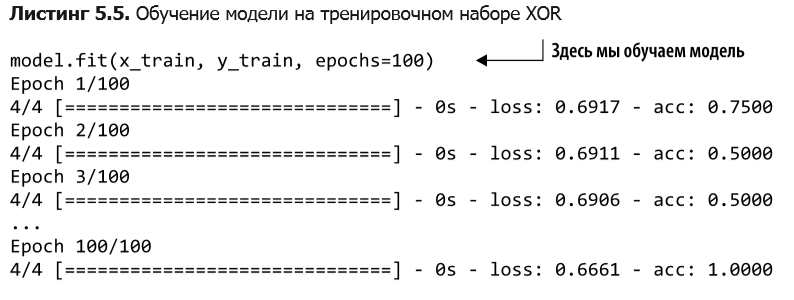

Листинг 5.5. Обучение модели на тренировочном наборе XOR

In [26]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 417ms/step - loss: 0.6985 - accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 0.6979 - accuracy: 0.2500
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 0.6973 - accuracy: 0.2500
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 0.6968 - accuracy: 0.2500
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 0.6963 - accuracy: 0.2500
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 0.6958 - accuracy: 0.5000
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 0.6954 - accuracy: 0.5000
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 0.6949 - accuracy: 0.5000
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 0.6945 - accuracy: 0.5000
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 0.6941 - accuracy: 0.5000
Epoch 11/100
1/1 [=========

**СОВЕТ** 
>Сеть может не сойтись с первой попытки. Первый вызов compile может вернуть такие параметры из случайного распределения, при которых очень сложно или даже невозможно найти глобальный минимум. В подобном случае лучше вызвать model.fit снова с теми же параметрами (или увеличить количество эпох) и посмотреть, не сойдется ли сеть. Или задайте новые случайные начальные значения для сети и попробуйте запустить fit для них. В этом случае проверьте, не задали ли вы начальное значение генератора случайных чисел (seed), иначе вы просто будете повторять один и тот же опыт снова и снова.


По мере многократного прохода по нашему крошечному набору данных сеть разобралась, что к чему. Она обучилась исключающему ИЛИ (XOR) просто по показанным ей примерам! Вот подлинная магия нейронных сетей, которая будет сопровождать вас в следующих главах: 

In [31]:
#model.predict_classes(x_train) - устаревешйи вариант
predict_x=model.predict(x_train) 
classes_x=np.argmax(predict_x,axis=1)

1/1 [==============================] - 0s 24ms/step


In [28]:
model.predict(x_train)

1/1 [==============================] - 0s 77ms/step


array([[0.4577885 ],
       [0.5251115 ],
       [0.51023453],
       [0.51102686]], dtype=float32)

Повторный вызов метода predict (и метода predict_classes) для обученной модели демонстрирует лучшие результаты. При нем точность на нашем крошечном наборе данных составляет 100 %. Конечно, точность — не обязательно лучшая мера для предсказательной модели, но здесь она подходит. Так что мы сохраним нашу революционную модель XOR для будущих поколений в листинге 5.6.

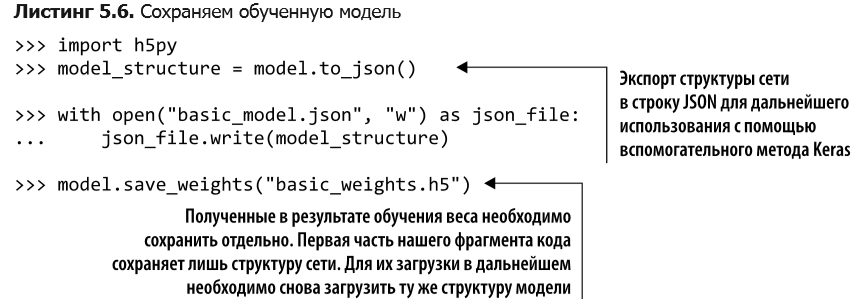

Листинг 5.6. Сохраняем обученную модель


In [34]:
import h5py
model_structure=model.to_json()

with open('basic_model.json', "w") as json_file:
  json_file.write(model_structure)

model.save_weights("basic_weights.h5")

Существуют аналогичные методы для загрузки структуры модели, так что не обязательно производить повторное обучение всякий раз, когда нужно выполнять предсказание. Это огромный шаг вперед. Хотя обучение данной модели занимает всего несколько секунд, в следующих главах на работу примеров могут уйти минуты, часы, а в некоторых случаях и дни, в зависимости от аппаратного обеспечения и сложности модели, готовьтесь! 

###5.1.8. Вперед и вглубь

 По мере распространения нейронных сетей и порождения ими целой сферы глубокого обучения было проведено (и проводится) множество исследований, посвященных их устройству, в том числе: 

* различным функциям активации (например, сигма-функции, выпрямленным линейным блокам и гиперболическому тангенсу); 

* выбору оптимальной скорости обучения для усиления/ослабления влияния ошибки; 

* динамической подстройке скорости обучения с помощью модели моментума (momentum) для ускорения поиска глобального минимума; 
* применению дропаута (dropout), при котором выбранный случайным образом набор весов игнорируется в данном проходе обучения, чтобы уменьшить вероятность излишней подгонки модели к тренировочному набору данных (переобучения); 
* регуляции весов для искусственного сдерживания слишком сильного роста/ уменьшения одного из весов по сравнению с остальными (еще один прием, с помощью которого можно избежать переобучения).

Этот список можно продолжать еще очень долго. 

### 5.1.9. Нормализация: «стильный» входной сигнал 

Для нейронных сетей требуется векторный входной сигнал, и они извлекают максимум из полученных данных. Есть ключевой аспект, о котором нужно не забывать: нормализация (normalization) входного сигнала. Это справедливо для множества моделей машинного обучения. Представьте задачу классификации домов, например, по вероятности их продажи на заданном рынке. У нас есть только две точки данных: число спален и прошлая цена продажи. Их можно представить в виде вектора. Скажем, для дома с двумя спальными комнатами, который в прошлый раз был продан за 275 тысяч долларов: 

In [37]:
input_vec = [2, 275000]
input_vec

[2, 275000]

Когда сеть будет пытаться усвоить какую-либо информацию о данных, веса в первом слое, соответствующие спальням, быстро вырастут до очень больших значений, чтобы сравняться по масштабу со значениями, аналогичными цене. Поэтому данные часто нормализуют, чтобы все элементы сохраняли полезную информацию во всех выборках. Нормализация также гарантирует работу нейронов в схожих диапазонах входных значений для различных элементов одного вектора выборки. Существует несколько ее способов, например нормализация по среднему, масштабирование признаков и коэффициент вариации. Но их общая цель — привести данные в один диапазон, например [–1, 1] или [0, 1] для всех элементов всех выборок, без потери информации. 

Об этом не стоит слишком задумываться при NLP, поскольку TF-IDF, унитарное представление и Word2vec (как вы вскоре увидите) уже нормализованы. Об этом нужно помнить, если входные векторы признаков не нормализованы (например, если они представляют собой исходные частотности или количества слов). 

Еще немного о терминологии. Среди исследователей нет единого мнения о том, что представляют собой перцептрон, многонейронный слой и глубокое обучение. Нам кажется удобным различать перцептрон и нейронную сеть при использовании производной функции активации для должного обновления весов. В этой книге мы будем употреблять в этом контексте термины «нейронная сеть» и «глубокое обучение», сохраняя для термина «перцептрон» важное место в истории. 

**Резюме** 
* Минимизация функции стоимости — путь к обучению. 
* Сеть обучается на основе алгоритма обратного распространения ошибки. 
* Степень обновления веса прямо пропорциональна его вкладу в ошибку модели. 
* Нейронные сети являются механизмами оптимизации. 
* Остерегайтесь ловушек в виде локальных минимумов при обучении, отслеживайте постепенное снижение ошибки. 
* Математика нейронных сетей становится доступнее благодаря библиотеке Keras.